#### Este bloco de código realiza a importação de bibliotecas necessárias (NumPy e Matplotlib) e módulos do Keras para criar um modelo de rede neural sequencial com uma camada LSTM e uma camada densa. Essas camadas são comumente usadas em tarefas que envolvem processamento de sequências e aprendizado profundo.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

##### Este bloco de código gera uma série temporal fictícia e prepara os dados para serem utilizados como entrada em uma camada LSTM. A função prepare_data cria sequências de entrada (X) e saídas correspondentes (y). Os dados são exibidos antes e depois de serem ajustados para o formato adequado para treinamento de uma LSTM.

In [5]:
np.random.seed(42)
timesteps = 100
series = np.random.normal(3000,500,timesteps)

def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 10
X, y = prepare_data(series, n_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))

##### Este bloco de código constrói, treina e utiliza um modelo LSTM para prever o próximo valor em uma série temporal. Ele define a arquitetura da rede neural, treina o modelo com dados de entrada e saída, faz uma previsão para o próximo valor e visualiza os resultados.

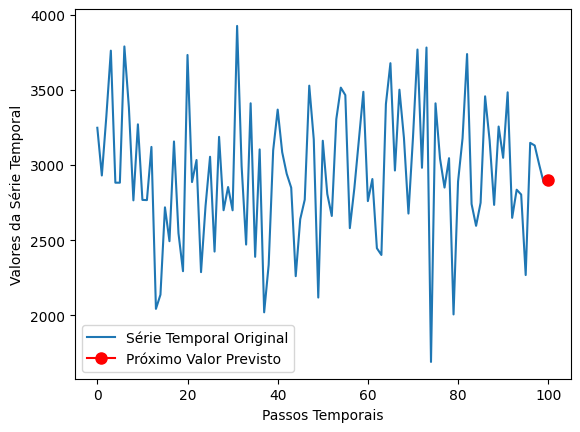

In [6]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=100, verbose=0)

x_input = series[-n_steps:]
x_input = x_input.reshape((1, n_steps, 1))
y_pred = model.predict(x_input, verbose=0)

plt.plot(series, label='Série Temporal Original')
plt.plot(range(timesteps, timesteps+1), y_pred[0], marker='o', markersize=8, label='Próximo Valor Previsto', color='red')
plt.xlabel('Passos Temporais')
plt.ylabel('Valores da Série Temporal')
plt.legend()
plt.show()